In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), 1.99 MiB | 6.70 MiB/s, done.
From https://github.com/lutzhamel/ds-assets
   a9c6a6c..6e8c87b  main       -> origin/main
Updating a9c6a6c..6e8c87b
Fast-forward
 assets/perceptron-learning.gif | Bin 0 -> 2087907 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 assets/perceptron-learning.gif


# Models of Data

We saw one model of data already -- the *Decision Tree*

There are many more.  Here are a few more that are supported by scikit-learn:

>Support Vector Machines, kNN, Random Forests, Linear Regression


# Statistical Models vs Machine Learning

* Virtually no difference - more of a historical nomenclature given where the model came from (Statistics vs CS) than anything else

* Some of the older stats models make assumptions on the shape (distribution) of the data they work on

* To acknowledge that there is a confluence of Stats and Machine Learning we often talk about *Statistical Learning*

* Here, when we talk about machine learning we mean both statistical and computational approaches


# Machine Learning Revisited

* Machine learning involves building models using computational approaches to help understand data.

* Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

* These models exhibit features of learning because they let us draw  inferences from specific instances (data) to the general (prediction of unseen instances)



## Supervised Learning

**Supervised learning** involves modeling the relationship between features of data (independent attributes) and some target variable (dependent attribute) associated with the data.

Supervised learning can be further subdivided into *classification* tasks and *regression* tasks:

* **classification**, the target variable is  categorical and consists of labels representing discrete categories, e.g. play_tennis: yes/no
* **regression**, the target variable consists of numerical quantities, e.g. braking distance of a car.


## Unsupervised Learning


**Unsupervised learning** involves modeling the features of a dataset without reference to any label or target variable.

These models include tasks such as:

* **clustering** which identifies distinct groups of data, e.g. k-means.
* **dimensionality reduction** which searches for more succinct representations of the data, e.g. PCA.


# Classification Revisited

Up till now we have studied the decision tree which is an example of a classification model.
We have looked at the classic tree visualization of the model. For example, the decision tree limited to a depth of 2 for the iris dataset,

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/tree-model.png" height="120" width="260">

We visualized this tree model as the piecewise linear model using a scatter plot,

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/tree-viz.png" height="240" width="400">

Because decision tree models are composed of multiple linear decision surfaces -- lines that separate data points of different classes -- we call decision tree models often **piecewise linear models**.

## Simple Linear Classifiers

In classification problems involving two labels or classes where the data points of each of the classes form simple, non-overlapping clusters the classes can be separated by a  **linear decision surface** (a line or a plane).  The following is a typical scenario.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/classification2.jpg" height="300" width="300">


## The Perceptron

The [perceptron](https://en.wikipedia.org/wiki/Perceptron) is a particularly interesting classifier which consists of single neuron neural network and constructs a linear decision surface.  



<!-- ![perceptron](assets/perceptron.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron.jpg" height="300" width="500">

The weights $w_i$ and the bias term $b$ are called the **free parameters** which are the values the perceptron training algorithm has to determine for each dataset. The perceptron implements the following equation:

<!-- ![perceptron](assets/perceptron-eq.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-eq.jpg" height="80" width="450">

If you have taken linear algebra you will recognize the line/plane representation as a dot product.  The ${\rm sign}$ function implements the activation function of the neuron,

${\rm sign}(x) = -1 \mbox{ if } x \le 0 \mbox{ else } 1$

The symbol $\hat{f}$ denotes the neural network model.

The training algorithm is a simple **directed search**:

<!-- ![perceptron](assets/perceptron-train.jpg) -->
<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-train.jpg"  height="250" width="280">

More precisely, this is a directed search in that the `Update` step uses the *normal vector* $\bar{w}$ of the decision surface $\bar{w} \bullet \bar{x} + b$ as a guide in order to modify $\bar{w}$ and $\bar{b}$.

## Perceptron Learning

Perceptron learning a decision surface.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-learning.gif"  height="400" width="500">

**Observation**: The training algorithm searches the space of all possible decision surfaces in order to find one that separates the two classes correctly.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/perceptron-search.png"  height="400" width="500">


## Building a Perceptron

Let's build a perceptron using Sci-Kit Learn.

In [2]:
import pandas
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [3]:
# prepare our data
iris_df = pandas.read_csv(home+"iris.csv")

# The perceptron can only deal with two labels at a
# time so drop one of them: virginica
model_df = iris_df[iris_df.Species != 'virginica']

# feature matrix
# we only include the two variables that appeared in our tree model
# if Petal.Length =< 2.449999988079071:
#   |then setosa
#   |else if Petal.Width =< 1.75:
#   |  |then versicolor
#   |  |else virginica
model_features_df = model_df[['Petal.Length','Petal.Width']]

# target vector
# neural networks can only deal with numerical target values,
# recode the labels as numerical values
f = (lambda x: 1 if x == 'setosa' else -1)
model_target_df = model_df['Species'].apply(f)

In [4]:
# build and fit the perceptron model
model = Perceptron()
model.fit(model_features_df, model_target_df)

# model accuracy
predicted_values = pandas.DataFrame(model.predict(model_features_df), columns=['Species'])
print("Our model accuracy is: {}%".format(accuracy_score(model_target_df, predicted_values)*100))

Our model accuracy is: 100.0%


slope: -0.90
intercept: 3.00


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

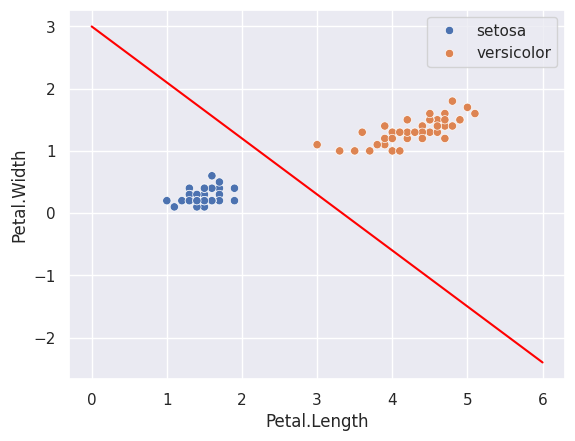

In [5]:
import seaborn as sns
sns.set()

# plot the model
# compute the model in terms that we can plot
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("slope: {:3.2f}".format(slope))
print("intercept: {:3.2f}".format(intercept))

# scatter plot of the data
sns.scatterplot(model_df, x='Petal.Length', y='Petal.Width', hue='Species')

# plot the model on top of the data
x_ticks = [0,6]
y_ticks = [slope * i + intercept for i in x_ticks]
sns.lineplot(x=x_ticks, y=y_ticks, color='red')

As expected, we see that the model perfectly separates the two classes.

# Regression

In regression problems we try to model continuous values rather than classifying a set of discrete values.

## Linear Regression

In linear regression we try to fit a line to data with a single independent numeric variable and a single dependent numeric variable.

Here is an example which given the speed of a car (as a numeric value) gives the breaking distance (as a numeric value).

In [6]:
import pandas

In [7]:
cars_df = pandas.read_csv(home+"cars.csv")
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


We can create a scatter plot of the dependent and independent variables to get a better feel for what's going on.

In [8]:
import seaborn as sns
sns.set()

<Axes: xlabel='speed', ylabel='dist'>

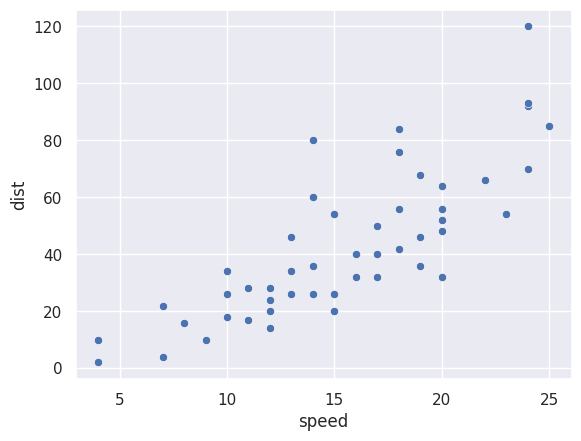

In [9]:
sns.scatterplot(cars_df, x='speed', y='dist')

We will model the relationship between speed and
distance with a linear regression model.

slope: 3.93
intercept: -17.58


<Axes: xlabel='speed', ylabel='dist'>

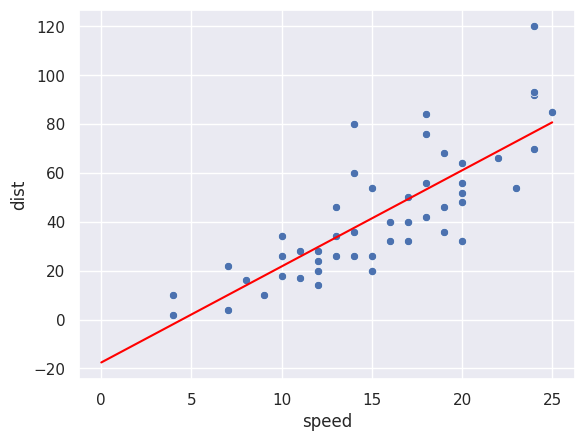

In [10]:
# train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(cars_df[['speed']],cars_df[['dist']])

# look at the model parameters
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print("slope: {:3.2f}".format(slope))
print("intercept: {:3.2f}".format(intercept))

# scatter plot the data
sns.scatterplot(cars_df, x='speed', y='dist')

# plot the model on top of the data
x_ticks = [0,25]
y_ticks = [slope * i + intercept for i in x_ticks]
sns.lineplot(x=x_ticks,y=y_ticks,color='red')

## Regression Model Evaluation - R^2 Score

Regression models do not have a notion of **classification accuracy** as we saw with decision trees and perceptrons, but they have an [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination).  Here, the closer to 1.0 the score the better the model.


In [11]:
# compute the R^2 score
print("R^2 score: {:3.2f}".format(model.score(cars_df[['speed']],cars_df[['dist']])))

R^2 score: 0.65


Not that great.  The low score is mainly due to the fact of the large errors (also called residuals) at the higher end of the speed spectrum.  The problem is that the data probably does not follow a linear relationship between speed and braking distance.  Let's try a different (non-linear) regression model to see if it can pick up this non-linear relationship.

## Non-Linear Regression: Regression Trees

Non-linear models allow us to model data that has non-linear relationship.  In our case we suspect that speed/dist has a non-linear relationship.

<Axes: xlabel='speed', ylabel='dist'>

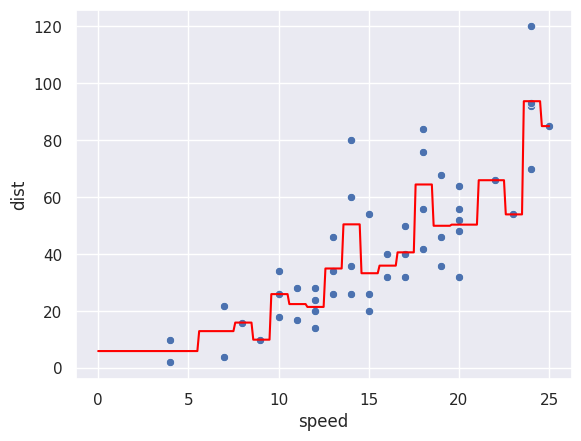

In [12]:
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
sns.set()

# get our dataset
cars_df = pd.read_csv(home+"cars.csv")

# pick model
model = DecisionTreeRegressor(max_depth=None)
model.fit(cars_df[['speed']],cars_df[['dist']])

# scatter plot the data
sns.scatterplot(cars_df, x='speed', y='dist')

# plot the model ontop of the data
x_ticks = pd.DataFrame({'speed':list(range(0,251))}) / 10.0   # 0 to 25 in .1 increments
y_ticks = pd.DataFrame(model.predict(x_ticks),columns=['dist'])
tree_data = pd.concat([x_ticks,y_ticks], axis=1)
sns.lineplot(data=tree_data,x='speed',y='dist',color='red')

In [13]:
# compute the R^2 score
print("R^2 score: {:3.2f}".format(model.score(cars_df[['speed']],cars_df[['dist']])))

R^2 score: 0.79


Yes, going to a non-linear regression model certainly improved things.  